In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split 

In [2]:
dataset_dir = '../PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00001-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00002-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00003-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00004-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00005-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00006-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00007-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv


In [3]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'post_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])

In [4]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
post_count          2
listed_count        1
active_date        81
dtype: int64

In [6]:
df.dropna(subset = ['account_id'], inplace=True)
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [7]:
df['post_count'] = df['post_count'].astype(float)
df['listed_count'] = df['listed_count'].astype(float)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  float64
 4   listed_count     134978 non-null  float64
 5   active_date      134978 non-null  float64
dtypes: float64(6)
memory usage: 7.2 MB
None
   account_id  followers_count  following_count  post_count  listed_count  \
0     58633.0           4155.0           4395.0     12823.0          72.0   
1     60453.0            438.0            757.0       515.0           9.0   
2     72373.0           4295.0           4728.0     16282.0         166.0   
3    658723.0            559.0             15.0      5991.0          25.0   
4    790886.0            877.0            415.0     11320.0          42.0   

   activ

In [8]:
features = df.iloc[:,1:]
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   post_count       134978 non-null  float64
 3   listed_count     134978 non-null  float64
 4   active_date      134978 non-null  float64
dtypes: float64(5)
memory usage: 6.2 MB
None
   followers_count  following_count  post_count  listed_count  active_date
0           4155.0           4395.0     12823.0          72.0       2470.0
1            438.0            757.0       515.0           9.0       2448.0
2           4295.0           4728.0     16282.0         166.0       2469.0
3            559.0             15.0      5991.0          25.0       2443.0
4            877.0            415.0     11320.0          42.0       2408.0


In [9]:
features_norm = MinMaxScaler().fit_transform(features)
features_norm = pd.DataFrame(features_norm, columns = list(features.columns))
print('Normalized Features')
print(features_norm.head())

Normalized Features
   followers_count  following_count  post_count  listed_count  active_date
0         0.002965         0.014794    0.053798  1.849950e-16     1.000000
1         0.000313         0.002548    0.002161  2.312437e-17     0.991093
2         0.003065         0.015915    0.068310  4.265162e-16     0.999595
3         0.000399         0.000050    0.025135  6.423436e-17     0.989069
4         0.000626         0.001397    0.047492  1.079137e-16     0.974899


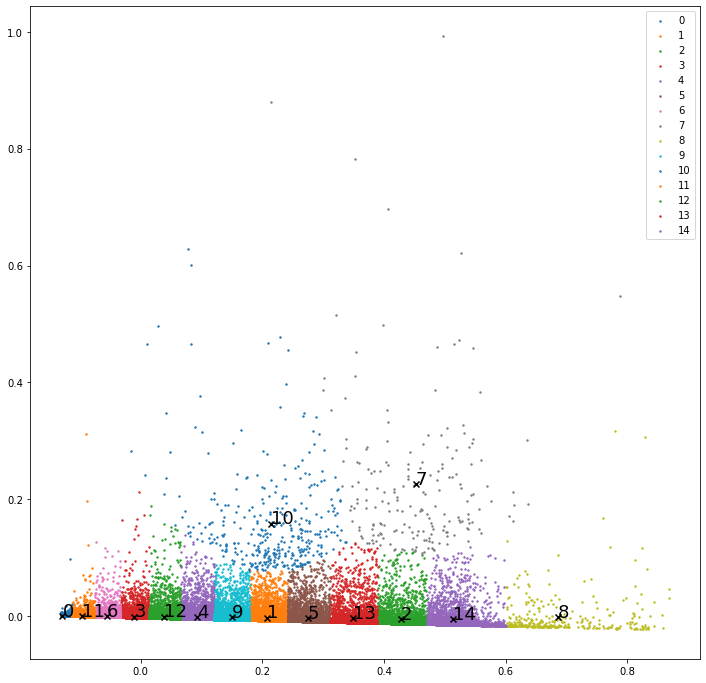

In [10]:
# use PCA to convert dimension to 2
pca = PCA(2)
data = pca.fit_transform(features_norm)

# fitting multiple k-means algorithms
k = 15
model = KMeans(n_clusters = k, init='k-means++')
model.fit(data)
pred = model.predict(data)
uniq = np.unique(pred)

centers = np.array(model.cluster_centers_)

# plot clusters
plt.figure(figsize=(12,12))

for i in uniq:
   plt.annotate(i, (centers[:,0][i], centers[:,1][i]), fontsize=18)
   plt.scatter(data[pred == i , 0], data[pred == i , 1], s = 2, label = i)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()

In [11]:
frame = features.copy()
frame['cluster'] = pred
print('Cluster counts')
print(frame['cluster'].value_counts())

Cluster counts
0     54784
11    15671
6     11092
3      9062
12     8272
4      7733
9      6485
1      5862
5      4737
13     4310
2      3253
14     2828
10      359
8       336
7       194
Name: cluster, dtype: int64


In [30]:
center = frame.groupby(['cluster']).mean()
center['cluster'] = uniq
center = center.sort_values(['followers_count','listed_count','post_count'], ascending=True)
# add ranking
center['rank'] = uniq + 1
center.to_json('center_location.json', orient='records', lines=True)


In [31]:
center

,followers_count,following_count,post_count,listed_count,active_date,cluster,rank
cluster,,,,,,,
0,8.849682,27.197466,11.607057,4.484886e-02,7.368721,0,1
11,34.737222,73.272159,119.201965,1.311339e-01,86.298896,11,2
6,53.637937,97.470429,279.139019,2.078976e-01,186.738009,6,3
3,82.305010,118.317480,482.535533,4.294855e+13,299.082115,3,4
12,121.154618,135.848767,688.095503,4.055851e-01,419.984163,12,5
4,139.076038,169.315402,927.102289,6.949437e-01,553.663132,4,6
9,146.210794,164.052274,1060.429761,9.165767e-01,694.062760,9,7
5,158.060376,184.185138,1438.649778,1.591936e+00,1002.552459,5,8
1,189.096554,191.737291,1215.886216,1.066701e+00,839.530024,1,9
